In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_3613/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import os
import copy
import hist
from coffea import util
import numpy as np
import itertools
import pandas as pd
import mplhep as hep
import HelpfulPlottingDefs as hpd

In [3]:
Year = 2016
btagWP = 'MediumBTag'
btagWPold = ''
vfp = 'preVFP'
saveOn = False
saveCSVOn = False

In [4]:
dir1 = 'CoffeaOutputsForCombine/Coffea_FirstRun/'

if btagWP != '':
    btagdir = f'{btagWP}/'
else:
    btagdir = btagWP
    
yeardir = f'{str(Year)}/'
btagType = 'DeepCSV'
APVDir = {
    'preVFP': 'APV/',
    'postVFP': 'noAPV/'
}

od = ''
oddir = ''
if btagdir == '':
    od = '_oldANdisc'
    oddir = f'Old{str(Year)}_MediumBTag/'

In [5]:
import LoadData as LD

JetHT_unweighted = LD.JetHT_Unweighted(btagWP, Year)
JetHT_unweighted_old = LD.JetHT_Unweighted(btagWPold, Year)

In [6]:
import LoadMC as LM

TTbar_unweighted = LM.TTbar_Unweighted(btagWP, Year)
TTbar_unweighted_old = LM.TTbar_Unweighted(btagWPold, Year)

# Old Taggers Data Cutflow

In [7]:
LD.Cutflow(JetHT_unweighted_old)

------- Data Sum of Cutflows --------
          all events :  594489591
                sumw :  594489591
               sumw2 :  594489591
  Passed MET Filters :  594489591
   Passed Trigger(s) :   67343846
       Passed HT Cut :   63289234
 Passed Loose Jet ID :   63289234
     Passed pT,y Cut :   63289234
         >= oneTTbar :   34486854
     Passed dPhi Cut :   34385454
        Good Subjets :   33555121
          AT&Pt0bcen :      79212
          AT&Pt0bfwd :      80790
          AT&Pt1bcen :      23642
          AT&Pt1bfwd :      23127
          AT&Pt2bcen :       2843
          AT&Pt2bfwd :       2314
             at0bcen :    1992995
             at0bfwd :    2133126
             at1bcen :     437393
             at1bfwd :     459939
             at2bcen :      28220
             at2bfwd :      28056
           pret0bcen :     534974
           pret0bfwd :     563546
           pret1bcen :     133980
           pret1bfwd :     136845
           pret2bcen :      11844
          

# New Taggers Data Cutflow

In [8]:
LD.Cutflow(JetHT_unweighted)

------- Data Sum of Cutflows --------
          all events :  594489591
                sumw :  594489591
               sumw2 :  594489591
  Passed MET Filters :  594489591
   Passed Trigger(s) :   67343846
       Passed HT Cut :   63289234
 Passed Loose Jet ID :   63289234
     Passed pT,y Cut :   63289234
         >= oneTTbar :   34486854
     Passed dPhi Cut :   34385454
        Good Subjets :   33555121
          AT&Pt0bcen :    1032705
          AT&Pt0bfwd :    1190219
          AT&Pt1bcen :     565962
          AT&Pt1bfwd :     591463
          AT&Pt2bcen :      50469
          AT&Pt2bfwd :      49089
             at0bcen :   11464804
             at0bfwd :   12484018
             at1bcen :    2529085
             at1bfwd :    2665916
             at2bcen :     150552
             at2bfwd :     151434
           pret0bcen :    1170587
           pret0bfwd :    1350375
           pret1bcen :     693914
           pret1bfwd :     725666
           pret2bcen :      87838
          

# Old Taggers TTbar Cutflow

In [9]:
LM.Cutflow(TTbar_unweighted_old)

-------- 700_1000_preVFP--------
          all events :     23506193
                sumw :  16150398044
               sumw2 : 11096452188288
       Passed HT Cut :      1233774
 Passed Loose Jet ID :      1233774
     Passed pT,y Cut :      1233774
         >= oneTTbar :       258200
     Passed dPhi Cut :       251851
        Good Subjets :       247784
          AT&Pt0bcen :         3042
          AT&Pt0bfwd :         1111
          AT&Pt1bcen :         6311
          AT&Pt1bfwd :         1705
          AT&Pt2bcen :         2816
          AT&Pt2bfwd :          342
             at0bcen :        13533
             at0bfwd :         7405
             at1bcen :        21648
             at1bfwd :         8897
             at2bcen :         7094
             at2bfwd :         1189
           pret0bcen :        14539
           pret0bfwd :         7162
           pret1bcen :        25072
           pret1bfwd :         9887
           pret2bcen :         8653
           pret2bfwd :       

# New Taggers TTbar Cutflow

In [10]:
LM.Cutflow(TTbar_unweighted)

-------- 700_1000_preVFP--------
          all events :     23506193
                sumw :  15998584290
               sumw2 : 11200760260736
       Passed HT Cut :      1233774
 Passed Loose Jet ID :      1233774
     Passed pT,y Cut :      1233774
         >= oneTTbar :       258200
     Passed dPhi Cut :       251851
        Good Subjets :       247784
          AT&Pt0bcen :        11061
          AT&Pt0bfwd :         7056
          AT&Pt1bcen :        29515
          AT&Pt1bfwd :        16706
          AT&Pt2bcen :         5920
          AT&Pt2bfwd :         1825
             at0bcen :        32300
             at0bfwd :        21310
             at1bcen :        42630
             at1bfwd :        23986
             at2bcen :         7710
             at2bfwd :         2434
           pret0bcen :        14370
           pret0bfwd :         8726
           pret1bcen :        45331
           pret1bfwd :        21512
           pret2bcen :        23384
           pret2bfwd :       

In [11]:
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
warnings.filterwarnings("ignore")

In [12]:
# ---- Optional to rescale x-axis of mistag rates ---- #
def forward(x):
    return x**(1/8)

def inverse(x):
    return x**8

In [13]:
Lum2016 = 35920. # pb^-1 from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable
Lum2017 = 41530.
Lum2018 = 59740.
Lum     = 137190.

t_BR = 0.6741
ttbar_BR = 0.4544 #PDG 2019
ttbar_xs1 = 831.76 * (0.09210) #pb For ttbar mass from 700 to 1000
ttbar_xs2 = 831.76 * (0.02474) #pb For ttbar mass from 1000 to Inf
toptag_sf = 0.9
toptag_kf = 0.7

if Year == 2016:
    if vfp == 'preVFP':
        Lum_frac = 19800. 
    else:
        Lum_frac = Lum2016 - 19800.
        
elif Year == 2017:
    Lum_frac = Lum2017
    
elif Year == 2018:
    Lum_frac = Lum2018
    
else:
    Lum_frac = Lum

# =========== SF =========== #
ttbar_sf1 = Lum_frac*ttbar_xs1*toptag_sf**2*toptag_kf/TTbar_unweighted[f'700_1000_{vfp}']['cutflow']['sumw']
ttbar_sf2 = Lum_frac*ttbar_xs2*toptag_sf**2*toptag_kf/TTbar_unweighted[f'1000_Inf_{vfp}']['cutflow']['sumw']

ttbar_sf1_old = Lum_frac*ttbar_xs1*toptag_sf**2*toptag_kf/TTbar_unweighted_old[f'700_1000_{vfp}']['cutflow']['sumw']
ttbar_sf2_old = Lum_frac*ttbar_xs2*toptag_sf**2*toptag_kf/TTbar_unweighted_old[f'1000_Inf_{vfp}']['cutflow']['sumw']

ttbar_scales = [ttbar_sf1, ttbar_sf2]
ttbar_scales_old = [ttbar_sf1_old, ttbar_sf2_old]

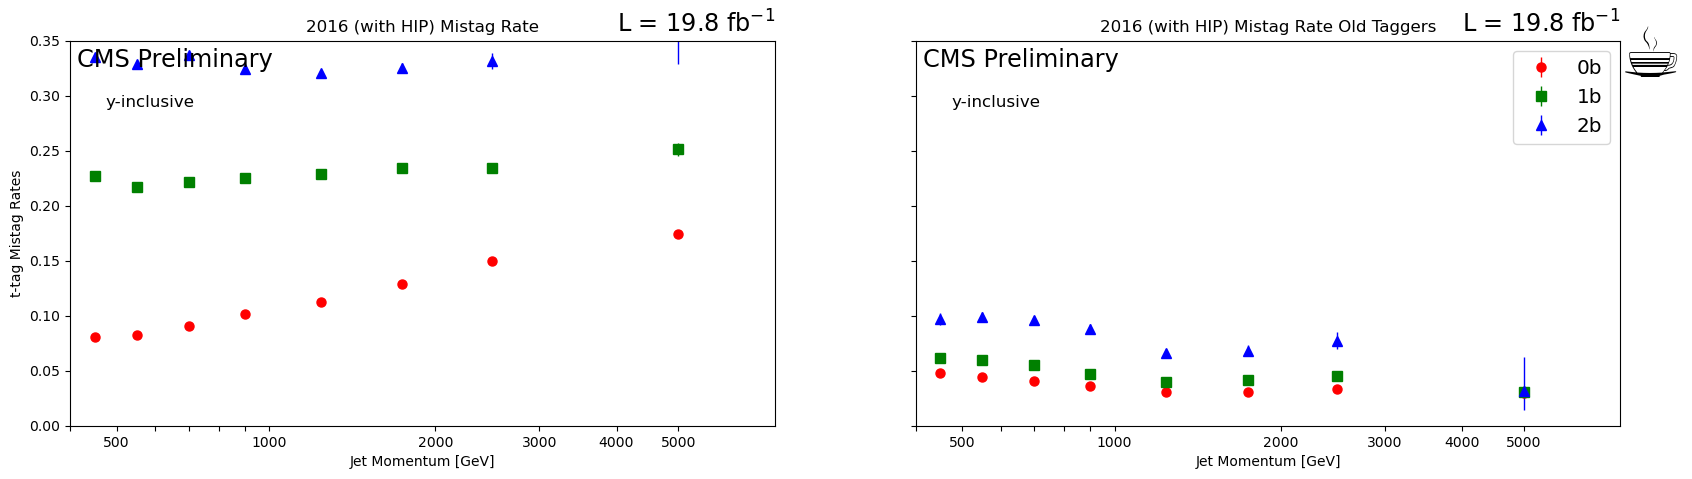

In [14]:
# =================================================================================================== #

fig, (ax, bx) = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(20,5),
    sharex=True,
    sharey=True
)
HIP = ''
if vfp == 'preVFP':
    HIP = ' (with HIP)'
title = f'{str(Year)}{HIP} Mistag Rate'

# =================================================================================================== #

Inc0b = hpd.GetMistagInfo(JetHT_unweighted, 0, Year, vfp)
Inc1b = hpd.GetMistagInfo(JetHT_unweighted, 1, Year, vfp)
Inc2b = hpd.GetMistagInfo(JetHT_unweighted, 2, Year, vfp)

Inc0b_old = hpd.GetMistagInfo(JetHT_unweighted_old, 0, Year, vfp)
Inc1b_old = hpd.GetMistagInfo(JetHT_unweighted_old, 1, Year, vfp)
Inc2b_old = hpd.GetMistagInfo(JetHT_unweighted_old, 2, Year, vfp)
            
# =================================================================================================== #

mistag_inclusive0b = hpd.plotratio(Inc0b['Num'], Inc0b['Denom'], ax = ax, histtype='errorbar', 
                           marker='.', markersize=13., color='r')

mistag_inclusive1b = hpd.plotratio(Inc1b['Num'], Inc1b['Denom'], ax = ax, histtype='errorbar', 
                           marker='s', markersize=7., color='g')

mistag_inclusive2b = hpd.plotratio(Inc2b['Num'], Inc2b['Denom'], ax = ax, histtype='errorbar', 
                           marker='^', markersize=7., color='b')

mistag_inclusive0b_old = hpd.plotratio(Inc0b_old['Num'], Inc0b_old['Denom'], ax = bx, histtype='errorbar', 
                           marker='.', markersize=13., color='r')

mistag_inclusive1b_old = hpd.plotratio(Inc1b_old['Num'], Inc1b_old['Denom'], ax = bx, histtype='errorbar', 
                           marker='s', markersize=7., color='g')

mistag_inclusive2b_old = hpd.plotratio(Inc2b_old['Num'], Inc2b_old['Denom'], ax = bx, histtype='errorbar', 
                           marker='^', markersize=7., color='b')

# =================================================================================================== #

plt.ylim(bottom = 0.0, top = 0.35)
plt.xlim([400,7000])

ax.set_ylabel('t-tag Mistag Rates')
ax.set_title(title)
bx.set_title(title + ' Old Taggers')
leg = bx.legend(labels=["0b", "1b", "2b"],fontsize='x-large')

# ---- Optional x-axis scaling ---- #
ax.set_xscale('function', functions=(forward, inverse))
plt.xticks(np.array([400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]))
ax.set_xticklabels(['', 500, '', '', '', '', 1000, 2000, 3000, 4000, 5000])

#---- Labeling ----#
Lint = str(Lum_frac*.001) # Integrated Luminosity
lumi = plt.text(1.0, 1.08, "L = " + Lint[:6] + " fb$^{-1}$",
        fontsize='xx-large',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes
       )
lumi2 = plt.text(1.0, 1.08, "L = " + Lint[:6] + " fb$^{-1}$",
        fontsize='xx-large',
        horizontalalignment='right',
        verticalalignment='top',
        transform=bx.transAxes
       )
CMS = plt.text(0.01, 0.98, 'CMS Preliminary',
        fontsize='xx-large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes
       )
CMS2 = plt.text(0.01, 0.98, 'CMS Preliminary',
        fontsize='xx-large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=bx.transAxes
       )
rap = plt.text(0.05, 0.86, 'y-inclusive',
        fontsize='large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes
       )
rap2 = plt.text(0.05, 0.86, 'y-inclusive',
        fontsize='large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=bx.transAxes
       )
coffee = plt.text(1.0, 0.87, u"☕",
              fontsize=50,
              horizontalalignment='left',
              verticalalignment='bottom',
              transform=bx.transAxes
             )

# =================================================================================================== #

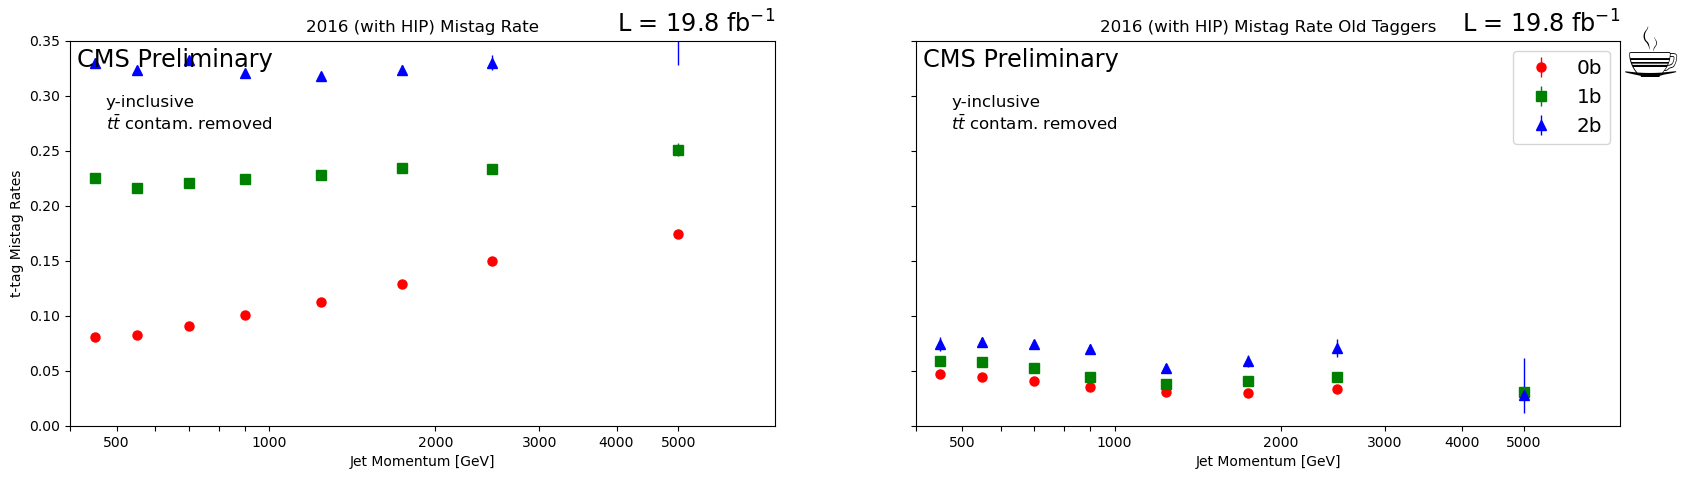

In [15]:
# =================================================================================================== #

fig, (ax, bx) = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(20,5),
    sharex=True,
    sharey=True
)
HIP = ''
if vfp == 'preVFP':
    HIP = ' (with HIP)'
title = f'{str(Year)}{HIP} Mistag Rate'

# =================================================================================================== #

inc0b = hpd.GetMistagInfoCR(TTbar_unweighted, JetHT_unweighted, 0, Year, vfp, ttbar_scales)
inc1b = hpd.GetMistagInfoCR(TTbar_unweighted, JetHT_unweighted, 1, Year, vfp, ttbar_scales)
inc2b = hpd.GetMistagInfoCR(TTbar_unweighted, JetHT_unweighted, 2, Year, vfp, ttbar_scales)

inc0b_old = hpd.GetMistagInfoCR(TTbar_unweighted_old, JetHT_unweighted_old, 0, Year, vfp, ttbar_scales_old)
inc1b_old = hpd.GetMistagInfoCR(TTbar_unweighted_old, JetHT_unweighted_old, 1, Year, vfp, ttbar_scales_old)
inc2b_old = hpd.GetMistagInfoCR(TTbar_unweighted_old, JetHT_unweighted_old, 2, Year, vfp, ttbar_scales_old)
            
# =================================================================================================== #

mistag_inclusive0b_cr = hpd.plotratio(inc0b['Num'], inc0b['Denom'], ax = ax, histtype='errorbar', 
                           marker='.', markersize=13., color='r')

mistag_inclusive1b_cr = hpd.plotratio(inc1b['Num'], inc1b['Denom'], ax = ax, histtype='errorbar', 
                           marker='s', markersize=7., color='g')

mistag_inclusive2b_cr = hpd.plotratio(inc2b['Num'], inc2b['Denom'], ax = ax, histtype='errorbar', 
                           marker='^', markersize=7., color='b')

mistag_inclusive0b_cr_old = hpd.plotratio(inc0b_old['Num'], inc0b_old['Denom'], ax = bx, histtype='errorbar', 
                           marker='.', markersize=13., color='r')

mistag_inclusive1b_cr_old = hpd.plotratio(inc1b_old['Num'], inc1b_old['Denom'], ax = bx, histtype='errorbar', 
                           marker='s', markersize=7., color='g')

mistag_inclusive2b_cr_old = hpd.plotratio(inc2b_old['Num'], inc2b_old['Denom'], ax = bx, histtype='errorbar', 
                           marker='^', markersize=7., color='b')

# =================================================================================================== #

plt.ylim(bottom = 0.0, top = 0.35)
plt.xlim([400,7000])

ax.set_ylabel('t-tag Mistag Rates')
ax.set_title(title)
bx.set_title(title + ' Old Taggers')
leg = bx.legend(labels=["0b", "1b", "2b"],fontsize='x-large')

# ---- Optional x-axis scaling ---- #
ax.set_xscale('function', functions=(forward, inverse))
plt.xticks(np.array([400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]))
ax.set_xticklabels(['', 500, '', '', '', '', 1000, 2000, 3000, 4000, 5000])

#---- Labeling ----#
Lint = str(Lum_frac*.001) # Integrated Luminosity
lumi = plt.text(1.0, 1.08, "L = " + Lint[:6] + " fb$^{-1}$",
        fontsize='xx-large',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes
       )
lumi2 = plt.text(1.0, 1.08, "L = " + Lint[:6] + " fb$^{-1}$",
        fontsize='xx-large',
        horizontalalignment='right',
        verticalalignment='top',
        transform=bx.transAxes
       )
CMS = plt.text(0.01, 0.98, 'CMS Preliminary',
        fontsize='xx-large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes
       )
CMS2 = plt.text(0.01, 0.98, 'CMS Preliminary',
        fontsize='xx-large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=bx.transAxes
       )
rap = plt.text(0.05, 0.86, 'y-inclusive',
        fontsize='large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes
       )
rap2 = plt.text(0.05, 0.86, 'y-inclusive',
        fontsize='large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=bx.transAxes
       )
contam = plt.text(0.05, 0.81, r'$t\bar{t}$ contam. removed',
        fontsize='large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes
       )
contam2 = plt.text(0.05, 0.81, r'$t\bar{t}$ contam. removed',
        fontsize='large',
        horizontalalignment='left',
        verticalalignment='top',
        transform=bx.transAxes
       )
coffee = plt.text(1.0, 0.87, u"☕",
              fontsize=50,
              horizontalalignment='left',
              verticalalignment='bottom',
              transform=bx.transAxes
             )

# =================================================================================================== #

[Text(400, 0, ''),
 Text(500, 0, '500'),
 Text(600, 0, ''),
 Text(700, 0, ''),
 Text(800, 0, ''),
 Text(900, 0, ''),
 Text(1000, 0, '1000'),
 Text(2000, 0, '2000'),
 Text(3000, 0, '3000'),
 Text(4000, 0, '4000'),
 Text(5000, 0, '5000')]

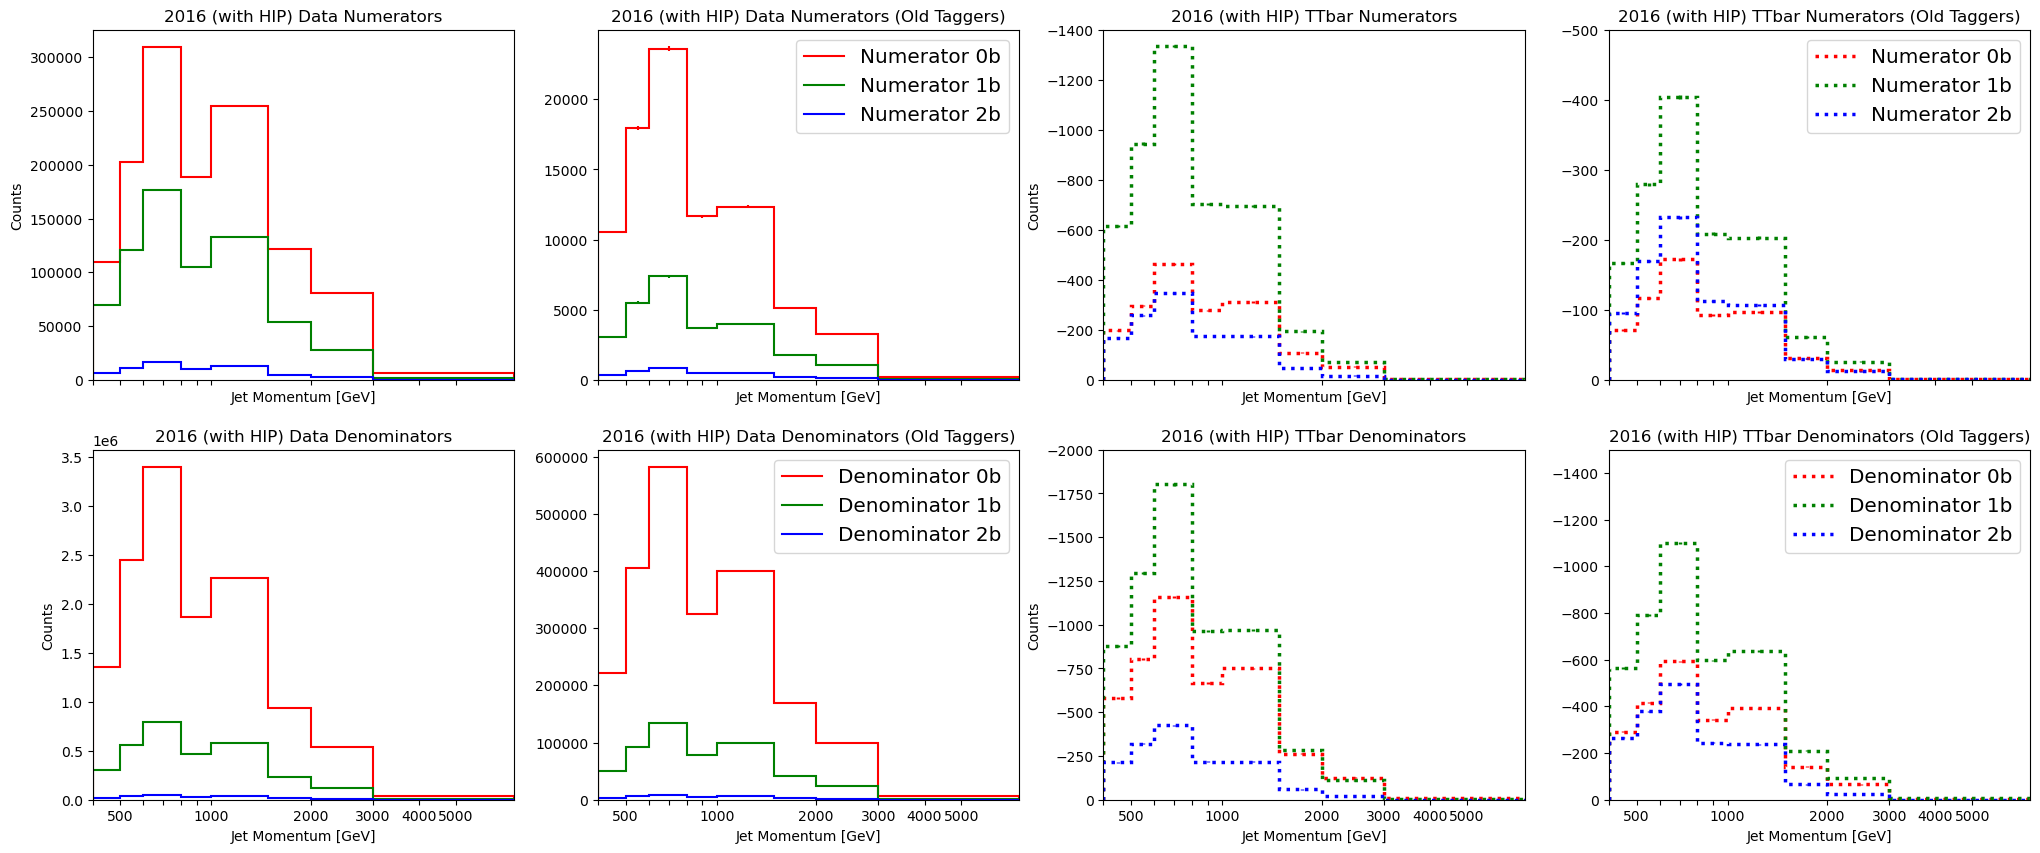

In [16]:
# =================================================================================================== #

fig, ([axDataNum, axDataNumOld, axTTNum, axTTNumOld], [axDataDenom, axDataDenomOld, axTTDenom, axTTDenomOld]) = plt.subplots(
    nrows = 2,
    ncols = 4,
    figsize=(25,10),
    sharex=True
    # sharey=True
)
HIP = ''
if vfp == 'preVFP':
    HIP = ' (with HIP)'
title = f'{str(Year)}{HIP}'

LS = 'dotted'
LW = 2.5

# =================================================================================================== #

Inc0b = hpd.GetMistagInfo(JetHT_unweighted, 0, Year, vfp)
Inc1b = hpd.GetMistagInfo(JetHT_unweighted, 1, Year, vfp)
Inc2b = hpd.GetMistagInfo(JetHT_unweighted, 2, Year, vfp)

Inc0b_old = hpd.GetMistagInfo(JetHT_unweighted_old, 0, Year, vfp)
Inc1b_old = hpd.GetMistagInfo(JetHT_unweighted_old, 1, Year, vfp)
Inc2b_old = hpd.GetMistagInfo(JetHT_unweighted_old, 2, Year, vfp)

Inc0bTT = hpd.GetMistagInfoTTbar(TTbar_unweighted, 0, Year, vfp, ttbar_scales)
Inc1bTT = hpd.GetMistagInfoTTbar(TTbar_unweighted, 1, Year, vfp, ttbar_scales)
Inc2bTT = hpd.GetMistagInfoTTbar(TTbar_unweighted, 2, Year, vfp, ttbar_scales)

Inc0bTT_old = hpd.GetMistagInfoTTbar(TTbar_unweighted_old, 0, Year, vfp, ttbar_scales_old)
Inc1bTT_old = hpd.GetMistagInfoTTbar(TTbar_unweighted_old, 1, Year, vfp, ttbar_scales_old)
Inc2bTT_old = hpd.GetMistagInfoTTbar(TTbar_unweighted_old, 2, Year, vfp, ttbar_scales_old)
            
# =================================================================================================== # 

Inc0b_Num = Inc0b['Num'].plot1d(ax=axDataNum, histtype='step', color='r')
Inc0b['Denom'].plot1d(ax=axDataDenom, histtype='step', color='r')

Inc1b['Num'].plot1d(ax=axDataNum, histtype='step', color='g')
Inc1b['Denom'].plot1d(ax=axDataDenom, histtype='step', color='g')

Inc2b['Num'].plot1d(ax=axDataNum, histtype='step', color='b')
Inc2b['Denom'].plot1d(ax=axDataDenom, histtype='step', color='b')

Inc0b_old['Num'].plot1d(ax=axDataNumOld, histtype='step', color='r')
Inc0b_old['Denom'].plot1d(ax=axDataDenomOld, histtype='step', color='r')

Inc1b_old['Num'].plot1d(ax=axDataNumOld, histtype='step', color='g')
Inc1b_old['Denom'].plot1d(ax=axDataDenomOld, histtype='step', color='g')

Inc2b_old['Num'].plot1d(ax=axDataNumOld, histtype='step', color='b')
Inc2b_old['Denom'].plot1d(ax=axDataDenomOld, histtype='step', color='b')

# =================================================================================================== #

Inc0bTT['Num'].plot1d(ax=axTTNum, histtype='step', linestyle=LS, lw=LW, color='r')
Inc0bTT['Denom'].plot1d(ax=axTTDenom, histtype='step', linestyle=LS, lw=LW, color='r')

Inc1bTT['Num'].plot1d(ax=axTTNum, histtype='step', linestyle=LS, lw=LW, color='g')
Inc1bTT['Denom'].plot1d(ax=axTTDenom, histtype='step', linestyle=LS, lw=LW, color='g')

Inc2bTT['Num'].plot1d(ax=axTTNum, histtype='step', linestyle=LS, lw=LW, color='b')
Inc2bTT['Denom'].plot1d(ax=axTTDenom, histtype='step', linestyle=LS, lw=LW, color='b')

Inc0bTT_old['Num'].plot1d(ax=axTTNumOld, histtype='step', linestyle=LS, lw=LW, color='r')
Inc0bTT_old['Denom'].plot1d(ax=axTTDenomOld, histtype='step', linestyle=LS, lw=LW, color='r')

Inc1bTT_old['Num'].plot1d(ax=axTTNumOld, histtype='step', linestyle=LS, lw=LW, color='g')
Inc1bTT_old['Denom'].plot1d(ax=axTTDenomOld, histtype='step', linestyle=LS, lw=LW, color='g')

Inc2bTT_old['Num'].plot1d(ax=axTTNumOld, histtype='step', linestyle=LS, lw=LW, color='b')
Inc2bTT_old['Denom'].plot1d(ax=axTTDenomOld, histtype='step', linestyle=LS, lw=LW, color='b')

# =================================================================================================== #

# plt.ylim(bottom = 0.0, top = 0.35)
plt.xlim([400,7000])

axDataNum.set_ylabel('Counts')
axDataDenom.set_ylabel('Counts')
axDataNum.set_title(title + ' Data Numerators')
axDataDenom.set_title(title + ' Data Denominators')

axDataNumOld.set_title(title + ' Data Numerators (Old Taggers)')
axDataDenomOld.set_title(title + ' Data Denominators (Old Taggers)')

axTTNum.set_ylabel('Counts')
axTTDenom.set_ylabel('Counts')
axTTNum.set_title(title + ' TTbar Numerators')
axTTDenom.set_title(title + ' TTbar Denominators')

axTTNumOld.set_title(title + ' TTbar Numerators (Old Taggers)')
axTTDenomOld.set_title(title + ' TTbar Denominators (Old Taggers)')

axTTNum.set_ylim(0., -1400.)
axTTDenom.set_ylim(0., -2000.)
axTTNumOld.set_ylim(0., -500.)
axTTDenomOld.set_ylim(0., -1500.)

leg1 = axDataNumOld.legend(labels=["Numerator 0b", "Numerator 1b", "Numerator 2b"],fontsize='x-large')
leg2 = axTTNumOld.legend(labels=["Numerator 0b", "Numerator 1b", "Numerator 2b"],fontsize='x-large')
leg3 = axDataDenomOld.legend(labels=["Denominator 0b", "Denominator 1b", "Denominator 2b"],fontsize='x-large')
leg4 = axTTDenomOld.legend(labels=["Denominator 0b", "Denominator 1b", "Denominator 2b"],fontsize='x-large')

# ---- Optional x-axis scaling ---- #
axDataNum.set_xscale('function', functions=(forward, inverse))
axDataDenomOld.set_xscale('function', functions=(forward, inverse))
plt.xticks(np.array([400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]))
axDataNum.set_xticklabels(['', 500, '', '', '', '', 1000, 2000, 3000, 4000, 5000])
axDataDenomOld.set_xticklabels(['', 500, '', '', '', '', 1000, 2000, 3000, 4000, 5000])

# =================================================================================================== #

In [17]:
NumData0bOld = np.sum(Inc0b_old['Num'].view().value)
NumData0bNew = np.sum(Inc0b['Num'].view().value)
NumData1bOld = np.sum(Inc1b_old['Num'].view().value)
NumData1bNew = np.sum(Inc1b['Num'].view().value)
NumData2bOld = np.sum(Inc2b_old['Num'].view().value)
NumData2bNew = np.sum(Inc2b['Num'].view().value)


NumTT0bOld = np.sum(Inc0bTT_old['Num'].view().value)
NumTT0bNew = np.sum(Inc0bTT['Num'].view().value)
NumTT1bOld = np.sum(Inc1bTT_old['Num'].view().value)
NumTT1bNew = np.sum(Inc1bTT['Num'].view().value)
NumTT2bOld = np.sum(Inc2bTT_old['Num'].view().value)
NumTT2bNew = np.sum(Inc2bTT['Num'].view().value)

In [18]:
DenomData0bOld = np.sum(Inc0b_old['Denom'].view().value)
DenomData0bNew = np.sum(Inc0b['Denom'].view().value)
DenomData1bOld = np.sum(Inc1b_old['Denom'].view().value)
DenomData1bNew = np.sum(Inc1b['Denom'].view().value)
DenomData2bOld = np.sum(Inc2b_old['Denom'].view().value)
DenomData2bNew = np.sum(Inc2b['Denom'].view().value)


DenomTT0bOld = np.sum(Inc0bTT_old['Denom'].view().value)
DenomTT0bNew = np.sum(Inc0bTT['Denom'].view().value)
DenomTT1bOld = np.sum(Inc1bTT_old['Denom'].view().value)
DenomTT1bNew = np.sum(Inc1bTT['Denom'].view().value)
DenomTT2bOld = np.sum(Inc2bTT_old['Denom'].view().value)
DenomTT2bNew = np.sum(Inc2bTT['Denom'].view().value)

<Axes: title={'center': 'Scaled TTbar Denominator Counts from New and Old Taggers'}, xlabel='# of b-tags'>

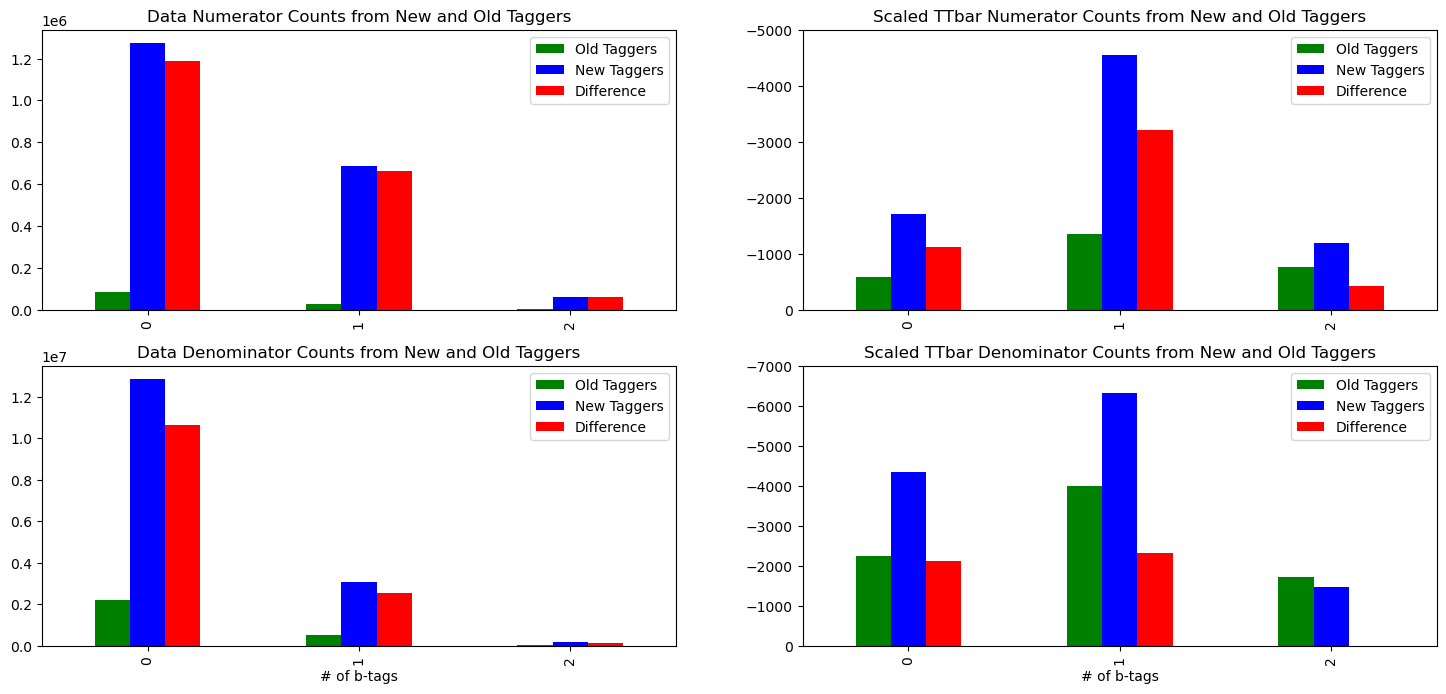

In [19]:
PlotType = 'linear'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,8))

Columns = ['# of b-tags', 'Old Taggers', 'New Taggers', 'Difference']

dfNumData = pd.DataFrame([['0', NumData0bOld, NumData0bNew, NumData0bNew-NumData0bOld], 
                          ['1', NumData1bOld, NumData1bNew, NumData1bNew-NumData1bOld], 
                          ['2', NumData2bOld, NumData2bNew, NumData2bNew-NumData2bOld]],
                  columns=Columns)
dfNumTT = pd.DataFrame([['0', NumTT0bOld, NumTT0bNew, NumTT0bNew-NumTT0bOld], 
                        ['1', NumTT1bOld, NumTT1bNew, NumTT1bNew-NumTT1bOld], 
                        ['2', NumTT2bOld, NumTT2bNew, NumTT2bNew-NumTT2bOld]],
                  columns=Columns)
dfDenomData = pd.DataFrame([['0', DenomData0bOld, DenomData0bNew, DenomData0bNew-DenomData0bOld], 
                            ['1', DenomData1bOld, DenomData1bNew, DenomData1bNew-DenomData1bOld], 
                            ['2', DenomData2bOld, DenomData2bNew, DenomData2bNew-DenomData2bOld]],
                  columns=Columns)
dfDenomTT = pd.DataFrame([['0', DenomTT0bOld, DenomTT0bNew, DenomTT0bNew-DenomTT0bOld], 
                          ['1', DenomTT1bOld, DenomTT1bNew, DenomTT1bNew-DenomTT1bOld], 
                          ['2', DenomTT2bOld, DenomTT2bNew, DenomTT2bNew-DenomTT2bOld]],
                  columns=Columns)

if PlotType == 'symlog':
    axes[0,1].set_ylim(bottom=0., top=-10000.)
    axes[1,1].set_ylim(bottom=0., top=-10000.)
else:
    axes[0,1].set_ylim(bottom=0., top=-5000.)
    axes[1,1].set_ylim(bottom=0., top=-7000.)

axes[0,0].set_yscale(PlotType)
axes[0,1].set_yscale(PlotType)
axes[1,0].set_yscale(PlotType)
axes[1,1].set_yscale(PlotType)

colors = ['green', 'blue', 'red']

dfNumData.plot(#x='# of b-tags',
        kind='bar',
        stacked=False,
        title='Data Numerator Counts from New and Old Taggers',
        color=colors,
        ax=axes[0,0])
dfNumTT.plot(#x='# of b-tags',
        kind='bar',
        stacked=False,
        title='Scaled TTbar Numerator Counts from New and Old Taggers',
        color=colors,
        ax=axes[0,1])
dfDenomData.plot(x='# of b-tags',
        kind='bar',
        stacked=False,
        title='Data Denominator Counts from New and Old Taggers',
        color=colors,
        ax=axes[1,0])
dfDenomTT.plot(x='# of b-tags',
        kind='bar',
        stacked=False,
        title='Scaled TTbar Denominator Counts from New and Old Taggers',
        color=colors,
        ax=axes[1,1])